<a href="https://colab.research.google.com/github/sumin2002/-/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%200404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
(x_train,t_train),(x_test,t_test)=cifar10.load_data()
batch_size=32
epochs=20
n_class=10
x_train=x_train/255
x_test=x_test/255
t_train=tf.keras.utils.to_categorical(t_train,n_class)
t_test=tf.keras.utils.to_categorical(t_test,n_class)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
model=Sequential()

In [28]:
model.add(Conv2D(32,(3,3), padding="same",input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Flatten()) #1차원 배열로 변환
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #드롭 아웃
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 15, 15, 64)        18496     
                                                      

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator=ImageDataGenerator(
    rotation_range=0.2,
    horizontal_flip=True)
generator.fit(x_train)

history=model.fit_generator(generator.flow(x_train,t_train,batch_size=batch_size),epochs=epochs,validation_data=(x_test,t_test))

Epoch 1/20


<ipython-input-30-fe657511011f>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator.flow(x_train,t_train,batch_size=batch_size),epochs=epochs,validation_data=(x_test,t_test))


1563/1563 [==============================] - 41s 19ms/step - loss: 1.5527 - accuracy: 0.4335 - val_loss: 1.1655 - val_accuracy: 0.5748
Epoch 2/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1477 - accuracy: 0.5922 - val_loss: 0.9745 - val_accuracy: 0.6530
Epoch 3/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0057 - accuracy: 0.6488 - val_loss: 0.9365 - val_accuracy: 0.6660
Epoch 4/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9140 - accuracy: 0.6803 - val_loss: 0.8814 - val_accuracy: 0.6962
Epoch 5/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8577 - accuracy: 0.6996 - val_loss: 0.8144 - val_accuracy: 0.7202
Epoch 6/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8155 - accuracy: 0.7151 - val_loss: 0.7824 - val_accuracy: 0.7292
Epoch 7/20
1563/1563 [==============================] - 34s 21ms/step - loss: 0.7789 - accuracy: 0.7275 - val_loss: 0.7508 - val_accura

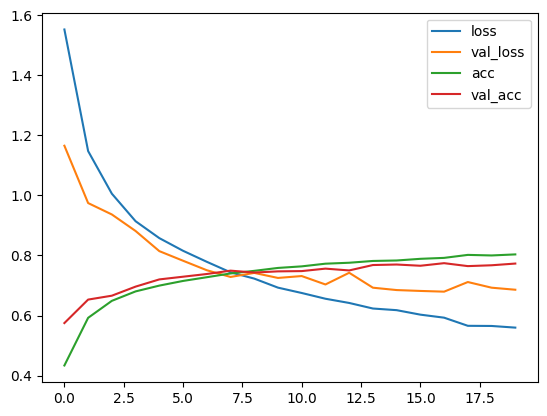

In [33]:
import matplotlib.pyplot as plt
train_loss=history.history['loss']
train_acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']

plt.plot(np.arange(len(train_loss)),train_loss,label='loss')
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')

plt.plot(np.arange(len(train_acc)),train_acc,label='acc')
plt.plot(np.arange(len(val_acc)),val_acc,label='val_acc')
plt.legend()
plt.show()

In [34]:
loss,accuracy=model.evaluate(x_test,t_test)
print('오차:',loss,'정밀도:',accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6858 - accuracy: 0.7730
오차: 0.6858387589454651 정밀도: 0.7730000019073486


In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
import os 
from keras.models import load_model

path='/content/drive/My Drive/sum/'
#디렉터리를 작성한다
if not os.path.exists(path):
  os.makedirs(path)

#파일을 저장한다
model.save(path+"model_sum.h5")

NameError: ignored